# Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

# Objective

* Explore and visualize the dataset.

* Build a linear regression model to predict the prices of used cars.

* Generate a set of insights and recommendations that will help the business.

**Data Dictionary -** 

S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase Cities

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# Loading libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms

# Loading and exploring the data

Loading the data into python to explore and understand it.

In [4]:
df = pd.read_csv("used_cars_data.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

np.random.seed(1)  # To get the same random results every time
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


`S.No.` is just an index for the data entry. In all likelihood, this column will not be a significant factor in determining the price of the car. 
Having said that, there are instances where the index of the data entry contains the information about time factor (an entry with a smaller index corresponds to data entered years ago). Therefore, we will not drop this variable just yet. Let us see if there is any relationship with the price when we do bivariate analysis.

`Car names` contain a lot of model information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.

`Mileage`, `Engine` and `Power` will also need some processing before we are able to explore them. We'll have to extract numerical information from these columns.

`New Price` column also needs some processing. This one also contains strings and a lot of missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


As expected, `Mileage`, `Engine`, `Power` and `New_Price` are objects when they should ideally be numerical. To be able to get summary statistics for these columns, We will have to process them first.

# Processing Columns

Let us process 'Mileage', 'Engine', 'Power' and 'New_Price' and extract numerical values from them.

#### 1. Mileage

We have car mileage in two units, kmpl and km/kg.

After a quick research on the internet it is clear that these 2 units are used for cars of 2 different fuel types.

kmpl - kilometers per litre - is used for petrol and diesel cars.
km/kg - kilometers per kg - is used for CNG and LPG based engines.

We have the variable `Fuel_type` in our data. Let us check if this observations holds true in our data also.

In [6]:
# Create 2 new columns after splitting the mileage values.
km_per_unit_fuel = []
mileage_unit = []

for observation in df["Mileage"]:
    if isinstance(observation, str):
        if (
            observation.split(" ")[0]
            .replace(".", "", 1)
            .isdigit()  # first element should be numeric
            and " " in observation  # space between numeric and unit
            and (
                observation.split(" ")[1]
                == "kmpl"  # units are limited to "kmpl" and "km/kg"
                or observation.split(" ")[1] == "km/kg"
            )
        ):
            km_per_unit_fuel.append(float(observation.split(" ")[0]))
            mileage_unit.append(observation.split(" ")[1])
        else:
            # To detect if there are any observations in the column that do not follow
            # the expected format [number + ' ' + 'kmpl' or 'km/kg']
            print(
                "The data needs further processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the mileage column,
        # we add corresponding missing values to the 2 new columns
        km_per_unit_fuel.append(np.nan)
        mileage_unit.append(np.nan)

In [7]:
# No print output from the function above. The values are all in the expected format or NaNs
# Add the new columns to the data

df["km_per_unit_fuel"] = km_per_unit_fuel
df["mileage_unit"] = mileage_unit

# Checking the new dataframe
df.head(5)  # looks good!

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl


In [8]:
# Let us check if the units correspond to the fuel types as expected.
df.groupby(by=["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

As expected, km/kg is for CNG/LPG cars and kmpl is for Petrol and Diesel cars.

#### 2. Engine 

The data dictionary suggests that `Engine` indicates the displacement volume of the engine in CC.
We will make sure that all the observations follow the same format - [numeric + " " + "CC"] and create a new numeric column from this column. 

This time, lets use a regrex to make all the neccesary checks.

In [9]:
# re module provides support for regular expressions
import re

# Create a new column after splitting the engine values.
engine_num = []

# Regex for numeric + " " + "CC"  format
regex_engine = "^\d+(\.\d+)? CC$"

for observation in df["Engine"]:
    if isinstance(observation, str):
        if re.match(regex_engine, observation):
            engine_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "CC"]  format
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the engine column, we add missing values to the new column
        engine_num.append(np.nan)

In [10]:
# No print output from the function above. The values are all in the same format - [numeric + " " + "CC"] OR NaNs
# Add the new column to the data

df["engine_num"] = engine_num

# Checking the new dataframe
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0


#### 3. Power 

The data dictionary suggests that `Power` indicates the maximum power of the engine in bhp.
We will make sure that all the observations follow the same format - [numeric + " " + "bhp"] and create a new numeric column from this column, like we did for `Engine`

In [11]:
# Create a new column after splitting the power values.
power_num = []

# Regex for numeric + " " + "bhp"  format
regex_power = "^\d+(\.\d+)? bhp$"

for observation in df["Power"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            power_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "bhp"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the power column, we add missing values to the new column
        power_num.append(np.nan)

The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  n

We can see that some Null values in power column exist as 'null bhp' string.
Let us replace these with NaNs

In [12]:
power_num = []

for observation in df["Power"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            power_num.append(float(observation.split(" ")[0]))
        else:
            power_num.append(np.nan)
    else:
        # If there are any missing values in the power column, we add missing values to the new column
        power_num.append(np.nan)

# Add the new column to the data
df["power_num"] = power_num

# Checking the new dataframe
df.head(10)  # looks good now

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,21.10,km/kg,814.0,55.20
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,23.08,kmpl,1461.0,63.10
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,11.36,kmpl,2755.0,171.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,20.54,kmpl,1598.0,103.60
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,22.30,kmpl,1248.0,74.00


#### 4. New_Price 

We know that `New_Price` is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

This column clearly has a lot of missing values. We will impute the missing values later. For now we will only extract the numeric values from this column.

In [13]:
# Create a new column after splitting the New_Price values.
new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The data needs furthur processing. All values are not similar  1.28 Cr
The data needs furthur processing. All values are not similar  1.04 Cr
The data needs furthur processing. All values are not similar  1 Cr
The data needs furthur processing. All values are not similar  1.04 Cr
The data needs furthur processing. All values are not similar  1.39 Cr
The data needs furthur processing. All values are not similar  1.02 Cr
The data needs furthur processing. All values are not similar  1.4 Cr
The data needs furthur processing. All values are not similar  1.06 Cr
The data needs furthur processing. All values are not similar  1.27 Cr
The data needs furthur processing. All values are not similar  1.13 Cr
The data needs furthur processing. All values are not similar  1.36 Cr
The data needs furthur processing. All values are not similar  1.66 Cr
The data needs furthur processing. All values are not similar  1.6 Cr
The data needs furthur processing. All values are not similar  1.28 Cr
The data ne

Not all values are in Lakhs. There are a few observations that are in Crores as well

Let us convert these to lakhs. 1 Cr = 100 Lakhs

In [14]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
df["new_price_num"] = new_price_num

# Checking the new dataframe
df.head(5)  # Looks ok

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN


# Feature Engineering

The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have to many unique values to be useful in prediction.

In [15]:
df["Name"].nunique()

2041

With 2041 unique names, car names are not going to be great predictors of the price in our current data.

But we can process this column to extract important information and see if that reduces the number of levels for this information.

#### 1. Car Brand Name

In [16]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())

# Check the data
df["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

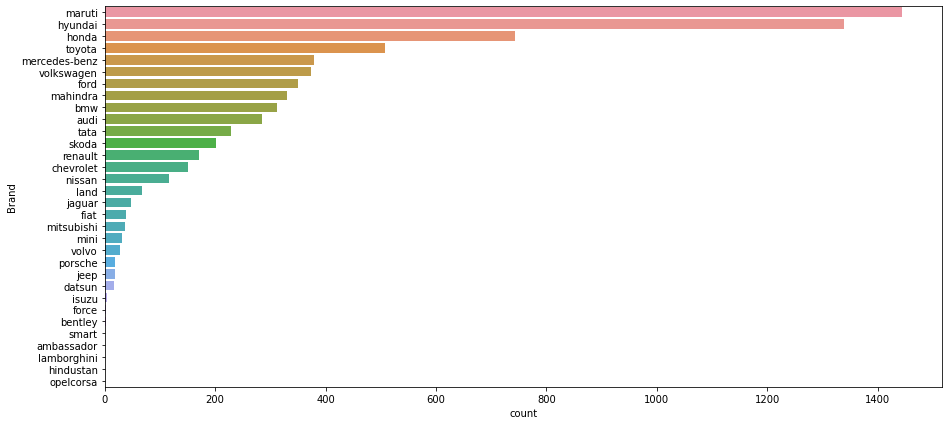

In [17]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Brand", data=df, order=df["Brand"].value_counts().index)

#### 2. Car Model Name

In [18]:
# Extract Model Names
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())

# Check the data
df["Model"].value_counts()

swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

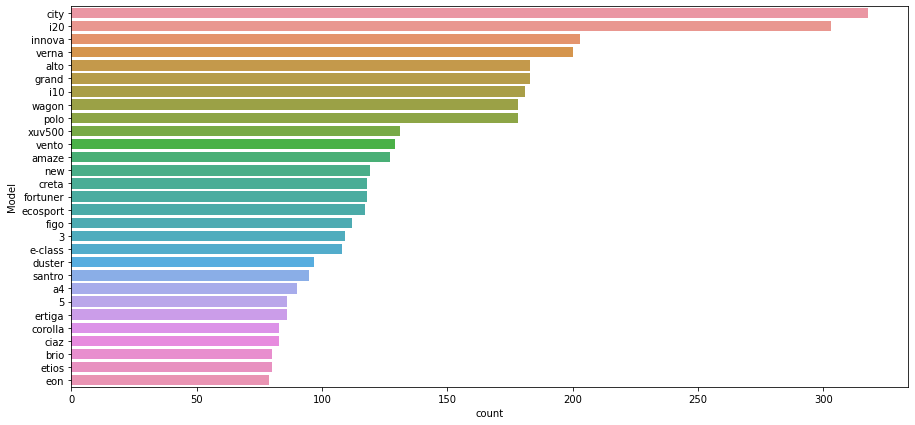

In [19]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Model", data=df, order=df["Model"].value_counts().index[1:30])

It is clear from the above charts that out dataset contains used cars from luxury as well as budget friendly brands.

We can create a new variable using this information. We will bin all our cars in 3 categories -

1. Budget Friendly
2. Mid Range
3. Luxury Cars

#### 3. Car_category

In [20]:
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

The output is very close to our expectation (domain knowledge), in terms of brand ordering. Mean price of a used Lamborghini is 120 Lakhs and that of cars from other luxury brands follow in a descending order.

Towards the bottom end we have the more budget friendly brands.

We can see that there is some missingness in our data. Let us come back to creating this variable once we have removed missingness from the data.

# Exploratory Data Analysis

In [21]:
# Basic summary stats - Numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
km_per_unit_fuel,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
engine_num,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
power_num,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00


**Observations**
1. S.No. clearly has no interpretation here but as discussed earlier let us drop it only after having looked at the initial linear model.
2. Kilometers_Driven values have an incredibly high range. We should check a few of the extreme values to get a sense of the data.
3. Minimum and maximum number of seats in the car also warrent a quick check. On an average a car seems to have 5 seats, which is about right.
4. We have used cars being sold at less than a lakh rupees and as high as 160 lakh, as we saw for Lamborghini earlier. We might have to drop some of these outliers to build a robust model.
5. Min Mileage being 0 is also concerning, we'll have to check what is going on.
6. Engine and Power mean and median values are not very different. Only someone with more domain knowledge would be able to comment furthur on these attributes.
7. New price range seems right. We have both budget friendly Maruti cars and Lamborghinis in our stock. Mean being twice that of the median suggests that there are only a few very high range brands, which again makes sense.

In [22]:
# Check Kilometers_Driven extreme values
df.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.00,15.97,kmpl,2993.0,258.00,NaN,bmw,x5
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,7.50,19.30,kmpl,1968.0,141.00,NaN,skoda,octavia
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.90,20.54,kmpl,1598.0,103.60,NaN,volkswagen,vento
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.70,20.36,kmpl,1197.0,78.90,NaN,hyundai,i10
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,NaN,13.00,16.96,kmpl,1968.0,138.03,NaN,volkswagen,jetta
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,5.00,17.40,kmpl,1497.0,117.30,NaN,honda,city
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.45,18.50,kmpl,1197.0,82.90,NaN,hyundai,i20
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,NaN,23.40,kmpl,1248.0,74.00,NaN,maruti,swift
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.0 kmpl,1405 CC,70 bhp,5.0,NaN,1.00,17.00,kmpl,1405.0,70.00,NaN,tata,indigo
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,NaN,4.00,12.80,kmpl,2494.0,102.00,NaN,toyota,innova


It looks like the first row here is a data entry error. A car manufactured as recently as 2017 having been driven 6500000 kms is almost impossible.

The other observations that follow are also on a higher end. There is a good chance that these are outliers. We'll look at this furthur while doing the univariate analysis.

In [23]:
# Check Kilometers_Driven Extreme values
df.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
1361,1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,3.60,24.70,kmpl,796.0,47.30,NaN,maruti,alto
5606,5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,6.8 Lakh,6.25,21.50,kmpl,1197.0,81.80,6.80,maruti,wagon
1198,1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.78 kmpl,999 CC,75 bhp,5.0,6.74 Lakh,5.68,18.78,kmpl,999.0,75.00,6.74,volkswagen,polo
5941,5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.45 Lakh,3.40,25.17,kmpl,799.0,53.30,4.45,renault,kwid
6201,6201,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,3.99 Lakh,NaN,24.70,kmpl,796.0,47.30,3.99,maruti,alto
1161,1161,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,20.3 kmpl,1199 CC,84 bhp,5.0,NaN,6.85,20.30,kmpl,1199.0,84.00,NaN,tata,tigor
1598,1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.49 kmpl,2179 CC,138.03 bhp,5.0,NaN,7.50,13.49,kmpl,2179.0,138.03,NaN,tata,xenon
173,173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,7.39 Lakh,6.50,18.90,kmpl,1197.0,81.86,7.39,hyundai,grand
1242,1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.6 kmpl,1999 CC,177 bhp,5.0,52.77 Lakh,40.00,13.60,kmpl,1999.0,177.00,52.77,jaguar,xe
5339,5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.19 kmpl,1197 CC,81.86 bhp,5.0,10.25 Lakh,8.60,17.19,kmpl,1197.0,81.86,10.25,hyundai,i20


After looking at the columns - Year, New Price and Price these entries seem feasible.

1000 might be default value in this case. Quite a few cars having driven exactly 1000 km is suspicious.

In [24]:
# Check seats extreme values
df.sort_values(by=["Seats"], ascending=True).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.00,10.5,kmpl,3197.0,NaN,NaN,audi,a4
693,693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,NaN,55.54,18.1,kmpl,3498.0,306.0,NaN,mercedes-benz,slk-class
798,798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,NaN,55.00,18.1,kmpl,3498.0,306.0,NaN,mercedes-benz,slk-class
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,NaN,120.00,6.4,kmpl,5204.0,560.0,NaN,lamborghini,gallardo
4722,4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.1 kmpl,5461 CC,387.3 bhp,2.0,NaN,29.50,8.1,kmpl,5461.0,387.3,NaN,mercedes-benz,sl-class


Audi A4 having 0 seats is clearly a data entry error. This column warrents some outlier treatment or we can treat seats == 0 as a missing value. Overall, there doesn't seem not much to be concerned about here.  

In [25]:
# Let us check if we have a similar car in our dataset.
df[df["Name"].str.startswith("Audi A4")]
# Looks like an Audi A4 typically has 5 seats.

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN,audi,a4
50,50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.43,17.11,kmpl,1968.0,174.33,NaN,audi,a4
65,65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN,13.50,16.55,kmpl,1968.0,140.00,NaN,audi,a4
103,103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN,9.80,14.94,kmpl,2967.0,241.40,NaN,audi,a4
150,150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,23.32,17.11,kmpl,1968.0,174.33,NaN,audi,a4
717,717,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,45979,Diesel,Automatic,Second,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,19.50,17.11,kmpl,1968.0,174.33,NaN,audi,a4
853,853,Audi A4 2.0 TDI,Delhi,2011,46000,Diesel,Automatic,Second,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,10.99,16.55,kmpl,1968.0,147.51,NaN,audi,a4
854,854,Audi A4 2.0 TDI,Kolkata,2012,47346,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,14.50,16.55,kmpl,1968.0,147.51,NaN,audi,a4
874,874,Audi A4 2.0 TDI Multitronic,Ahmedabad,2011,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN,12.50,16.55,kmpl,1968.0,140.00,NaN,audi,a4
964,964,Audi A4 2.0 TDI,Kolkata,2009,34000,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,9.95,16.55,kmpl,1968.0,147.51,NaN,audi,a4


In [26]:
# Let us replace #seats in row index 3999 form 0 to 5
df.loc[3999, "Seats"] = 5.0

In [27]:
# Check seats extreme values
df.sort_values(by=["Seats"], ascending=False).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2575,2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,5.50,14.8,kmpl,2499.0,80.0,NaN,chevrolet,tavera
1907,1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.65,13.1,kmpl,2446.0,75.0,NaN,toyota,qualis
6288,6288,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2005,150000,Diesel,Manual,Second,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,NaN,14.8,kmpl,2499.0,80.0,NaN,chevrolet,tavera
6242,6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000,Diesel,Manual,Second,12.2 kmpl,1948 CC,68 bhp,10.0,NaN,NaN,12.2,kmpl,1948.0,68.0,NaN,tata,sumo
814,814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.50,13.1,kmpl,2446.0,75.0,NaN,toyota,qualis


Of course, a Toyota Qualis has 10 seats and so does a Tata Sumo. We don't see any data entry error here.

In [28]:
# Check Mileage - km_per_unit_fuel extreme values
df.sort_values(by=["km_per_unit_fuel"], ascending=True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.12,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0 kmpl,999 CC,null bhp,5.0,NaN,2.30,0.0,kmpl,999.0,NaN,NaN,hyundai,santro
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.85,0.0,kmpl,NaN,NaN,NaN,honda,city
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,null bhp,5.0,NaN,5.45,0.0,kmpl,1968.0,NaN,NaN,volkswagen,jetta
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,NaN,0.0,kmpl,2179.0,115.0,NaN,land,rover
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,3.35,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.17,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,26.00,0.0,kmpl,2179.0,115.0,NaN,land,rover
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,15.50,0.0,kmpl,2179.0,115.0,NaN,land,rover
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,3.15,0.0,kmpl,NaN,NaN,NaN,hyundai,santro


We will have to treat Mileage = 0 as missing values

In [29]:
# Check Mileage - km_per_unit_fuel extreme values
df.sort_values(by=["km_per_unit_fuel"], ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
1332,1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.54 Lakh,2.96,33.54,km/kg,998.0,67.04,5.54,maruti,wagon
2059,2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.58 Lakh,3.05,33.54,km/kg,998.0,67.04,5.58,maruti,wagon
2371,2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.54 Lakh,3.90,33.54,km/kg,998.0,67.04,5.54,maruti,wagon
3129,3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.35 Lakh,3.25,33.54,km/kg,998.0,67.04,5.35,maruti,wagon
4141,4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.58 Lakh,2.85,33.54,km/kg,998.0,67.04,5.58,maruti,wagon
3869,3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,2.10,33.44,km/kg,796.0,40.30,NaN,maruti,alto
1269,1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.50,33.44,km/kg,796.0,40.30,NaN,maruti,alto
3553,3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.00,33.44,km/kg,796.0,40.30,NaN,maruti,alto
4769,4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.70,33.44,km/kg,796.0,40.30,NaN,maruti,alto
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,NaN,32.26,km/kg,998.0,58.20,NaN,maruti,alto


Maruti Wagon R and Maruti Alto CNG versions are budget friendly cars with high mileage so these data points are fine.

In [30]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later
for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # Will also show the NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")  # just for more space in between

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda Amaze S i-Dtech         32
Hyundai Grand i10 Sportz      32
Honda City 1.5 V MT           32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.



Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64



17.0 kmpl     207
18.9 kmpl     20

Since we haven't dropped the original columns that we processed, we have a few redunadant output here.

We had checked cars of different `Fuel_Type` earlier, but we did not encounter the 2 electric cars. Let us check why.

In [31]:
df.loc[df["Fuel_Type"] == "Electric"]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00,NaN,NaN,72.0,41.0,13.58,mahindra,e
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75,NaN,NaN,1798.0,73.0,NaN,toyota,prius


Mileage values for these cars are NaN, that is why we did not encounter these earlier with groupby.

Electric cars are very new in the market and very rare in our dataset. We can consider dropping these two observations if they turn out to be outliers later. There is a good chance that we will not be able to create a good price prediction model for electric cars, with the currently available data.

New Price for 6247 entries is missing. We need to explore if we can impute these or we should drop this column altogether.

## Missing Values

Before we start looking at the individual distributions and interactions, let's quickly check the missingness in the data.

In [32]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
km_per_unit_fuel        2
mileage_unit            2
engine_num             46
power_num             175
new_price_num        6247
Brand                   0
Model                   0
dtype: int64

* 2 Electric car variants don't have entries for Mileage.
* Engine displacement information of 46 observations is missing and maximum power of 175 entries is missing.
* Information about number of seats is not avaliable for 53 entries.
* New Price as we saw earlier has a huge missing count. We'll have to see if there is a pattern here.
* Price is also missing for 1234 entries. Since price is our response variable that we want to predict, we will have to drop these rows when we actually build a model. These rows will not be able to help us in modelling or model evaluation. But while we are analysing the distributions and doing missing value imputations, we will keep using information from these rows.

In [33]:
# Drop the redundant columns.
df.drop(
    columns=["Mileage", "mileage_unit", "Engine", "Power", "New_Price"], inplace=True
)

## Distributions

### Price

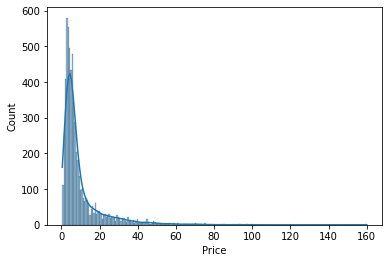

In [34]:
sns.histplot(df["Price"], kde=True)

This is a highly skewed distribution. Let us use log transformation on this column to see of that helps normalise the distribution.

Text(0.5, 0, 'Log(price)')

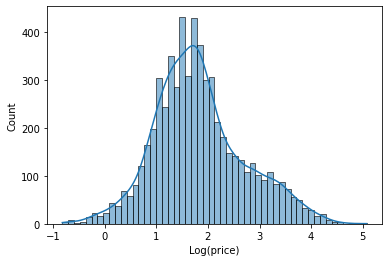

In [35]:
sns.histplot(np.log(df["Price"]), kde=True)
plt.xlabel('Log(price)')

In [36]:
# Log Transformation has definitely helped in reducing the skew
# Creating a new column with the transformed variable.
df["price_log"] = np.log(df["Price"])

### Price vs Location

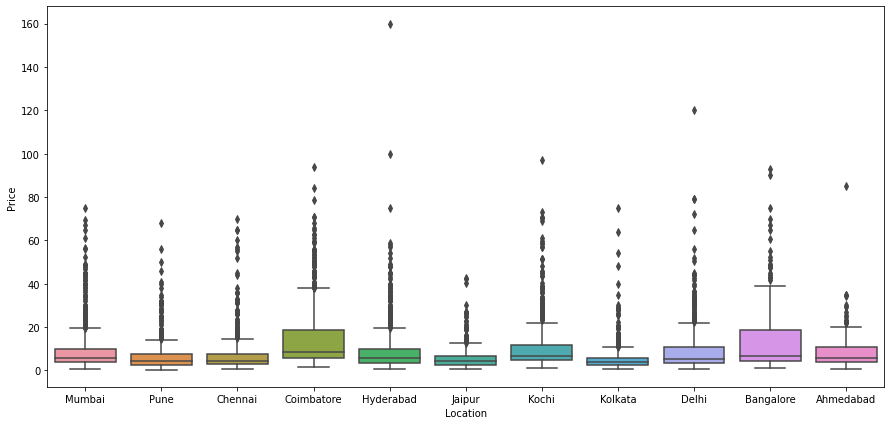

In [37]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Location", y="Price", data=df)

Price of used cars has a large IQR in Coimbatore and Bangalore

### Kilometers_Driven

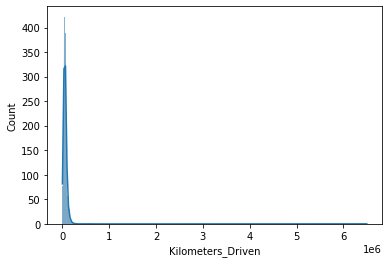

In [38]:
sns.histplot(df["Kilometers_Driven"], kde=True)

Text(0.5, 0, 'Log(Kilometers_Driven)')

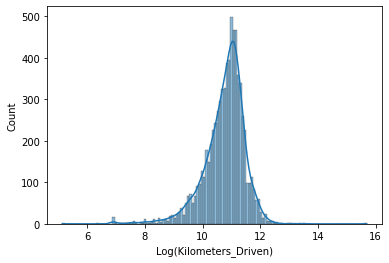

In [39]:
# Log transformation
sns.histplot(np.log(df["Kilometers_Driven"]), kde=True)
plt.xlabel("Log(Kilometers_Driven)")

Transformation has reduced the extreme skewness.

In [40]:
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

### Bivariate Distributions

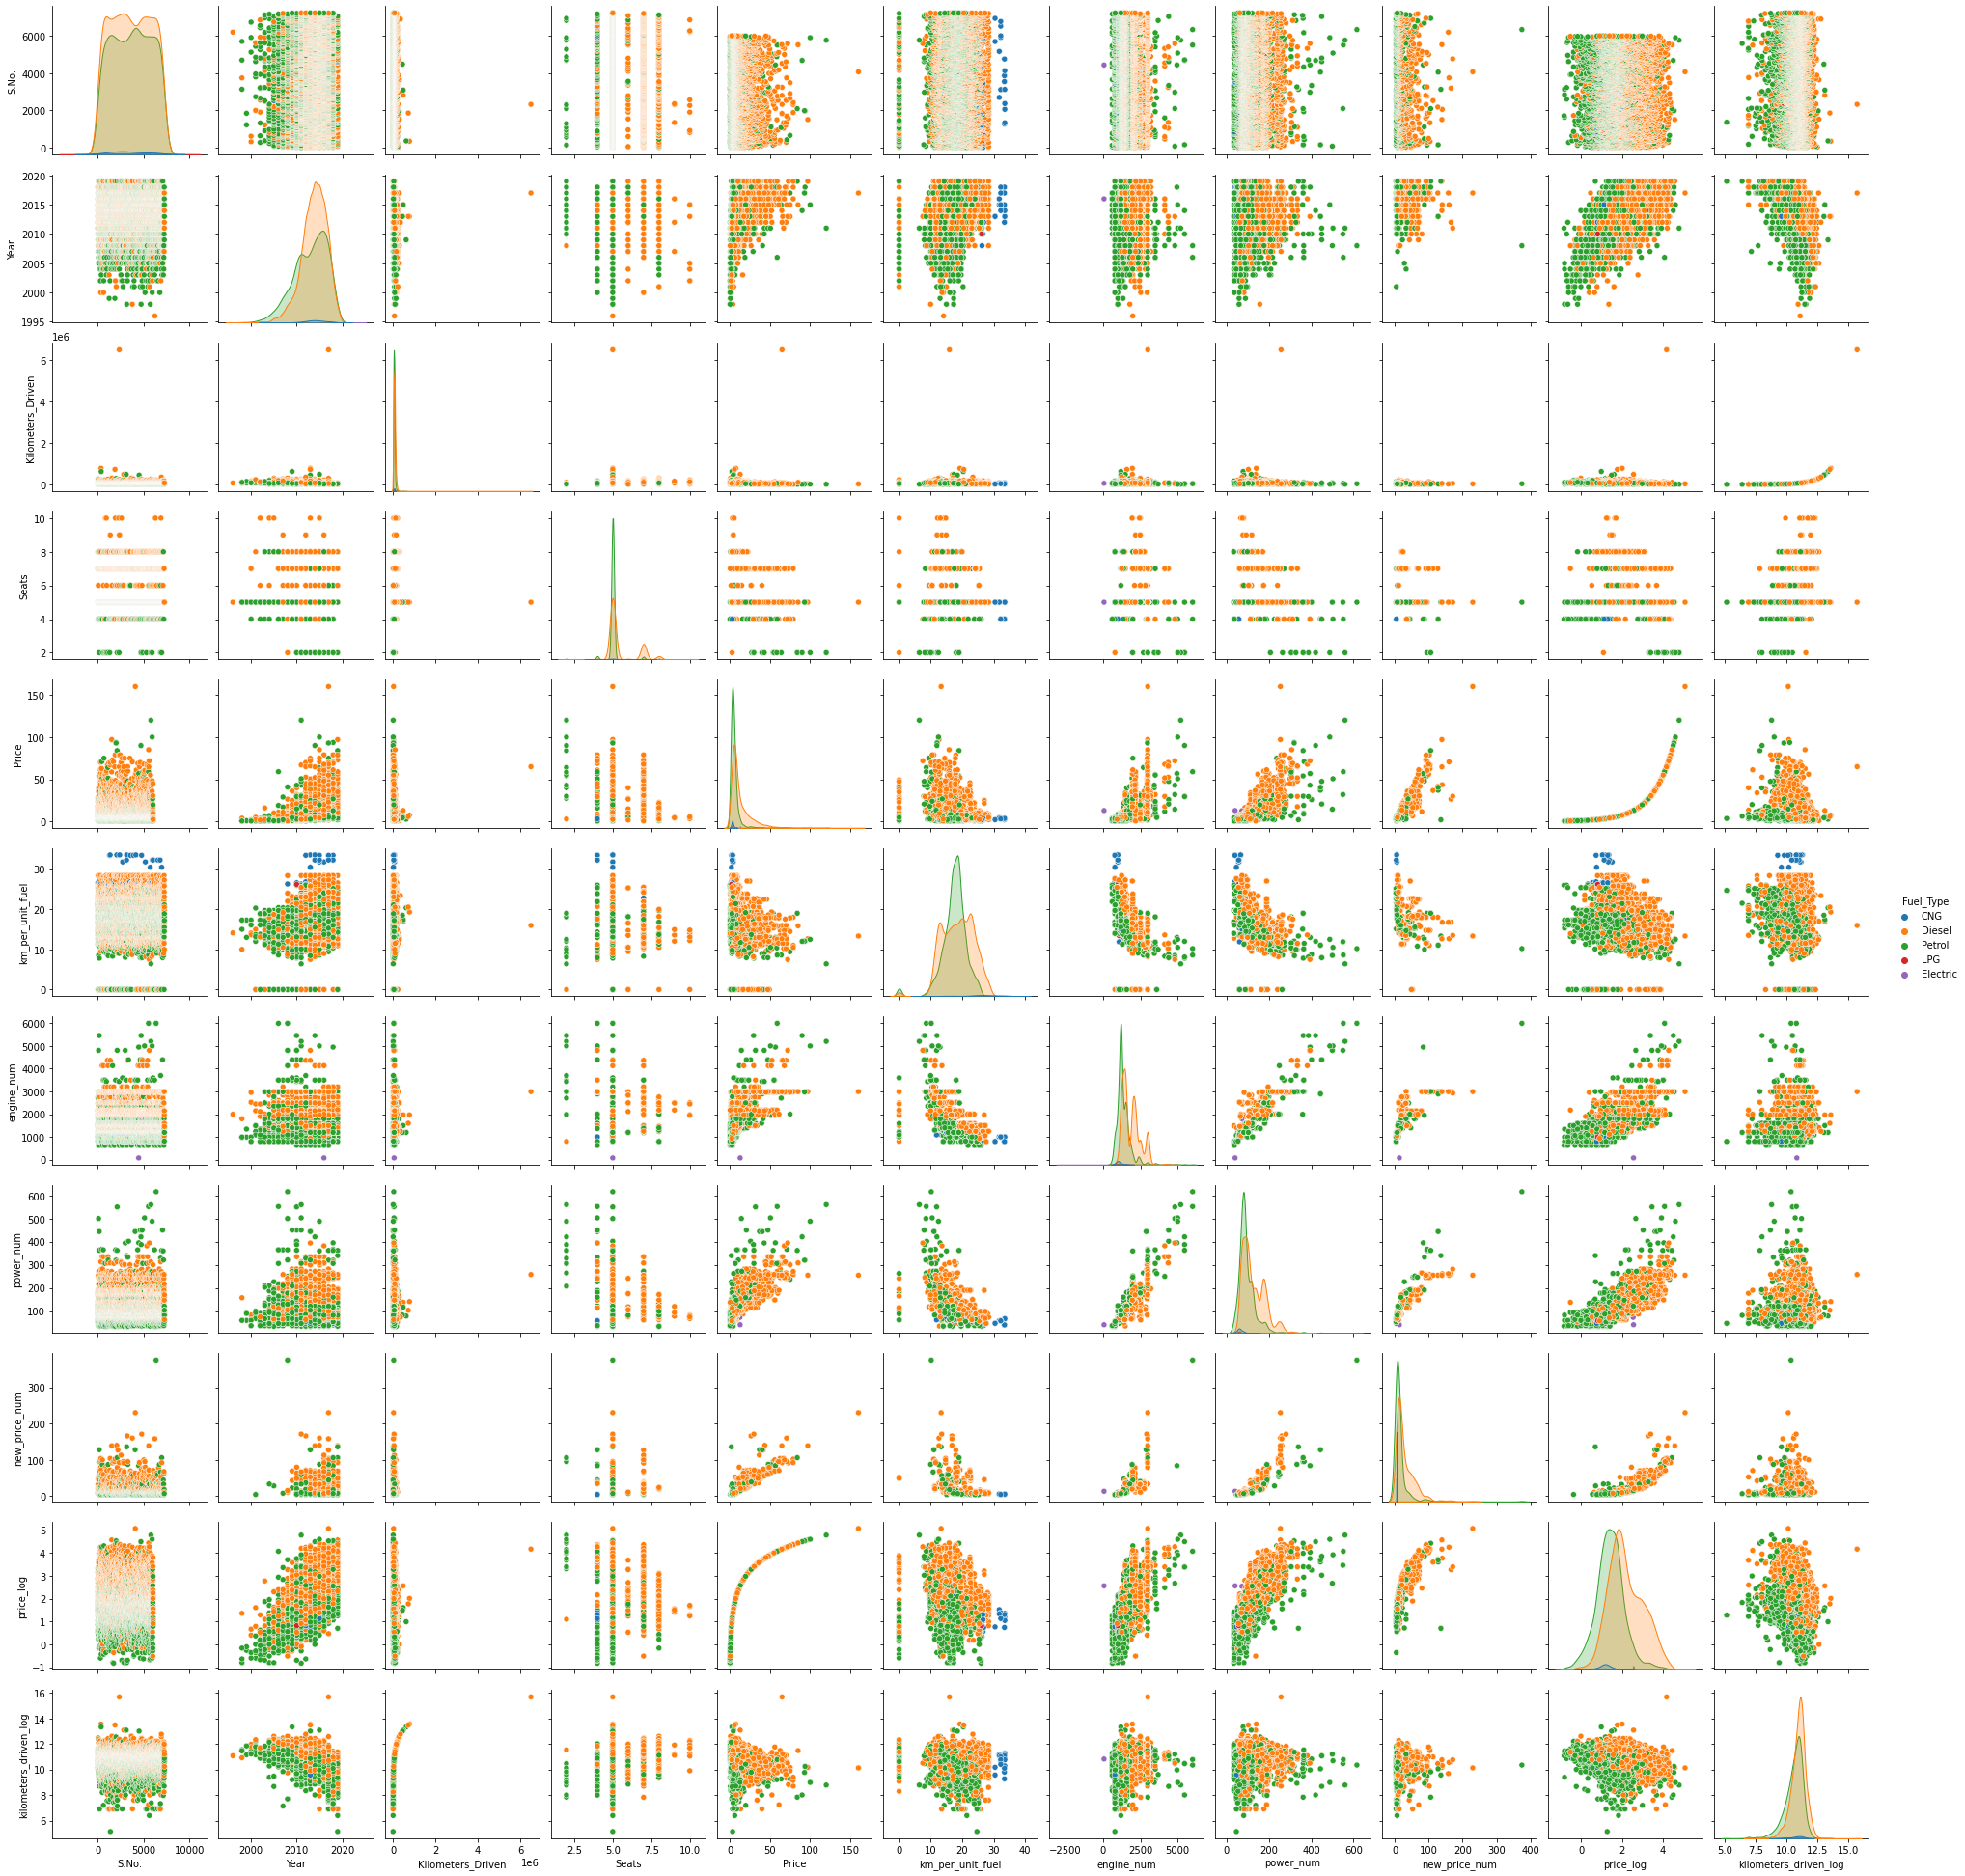

In [41]:
sns.pairplot(df, hue="Fuel_Type")

Zooming into these plots gives us a lot of information.

* Contrary to intuition Kilometers Driven does not seem to have a relationship with price.
* Price has a positive relationship with Year. Newer the car, higher the price.
* S.No. does not capture any information that we were hoping for. The temporal element of variation is captured in the year column.
* 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
* Mileage does not seem to show much relationship with the price of used cars.
* Engine displacement and Power of the car have a positive relationship with the price.
* New Price and Used Car Price are also positively correlated, which is expected.
* Kilometers Driven has a peculiar relationship with the Year variable. Generally, newer the car lesser the distance it has travelled, but this is not always true.
* CNG cars are conspicuous outliers when it comes to Mileage. The mileage of these cars is very high.
* Mileage and power of newer cars is increasing owing to advancement in technology.
* Mileage has a negative correlation with engine displacement and power. More powerful the engine, more fuel it consumes in general.

### Correlation between numeric Variables

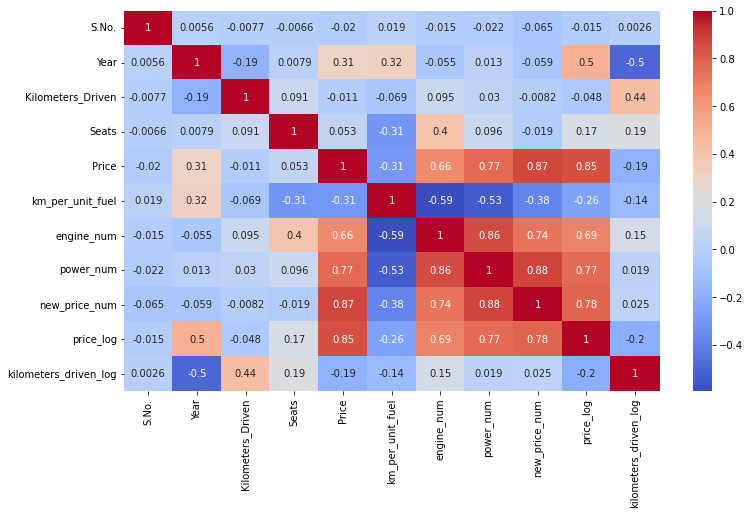

In [42]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

* Power and engine are important predictors of price
* We will have to work on imputing New Price missing values because this is a very important feature in predicting used car price accurately 

## Missing Value Treatment

In [43]:
# Missingness check once again
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
Price                    1234
km_per_unit_fuel            2
engine_num                 46
power_num                 175
new_price_num            6247
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

### Seats

In [44]:
# Look at a few rows where #seats is missing
df[df["Seats"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,2.95,0.00,NaN,NaN,NaN,honda,city,1.081805,11.002200
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,NaN,2.11,16.10,NaN,NaN,NaN,maruti,swift,0.746688,10.645449
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,3.60,0.00,1498.0,99.0,NaN,ford,figo,1.280934,11.162460
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,NaN,1.75,16.10,NaN,NaN,NaN,maruti,swift,0.559616,11.490680
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,26.50,0.00,NaN,NaN,NaN,land,rover,3.277145,10.915107
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,NaN,3.20,12.80,NaN,NaN,NaN,honda,city,1.163151,10.915179
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,NaN,5.80,16.10,NaN,NaN,NaN,maruti,swift,1.757858,10.825661
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,1.50,0.00,NaN,NaN,NaN,honda,city,0.405465,11.652687
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,40.88,0.00,NaN,NaN,NaN,land,rover,3.710641,11.142992
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,NaN,1.70,13.00,1493.0,100.0,NaN,honda,city,0.530628,11.385092


In [45]:
# We'll impute these missing values one by one, by taking median number of seats for the particular car,
# using the Brand and Model name
df.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [46]:
# Impute missing Seats
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [47]:
# Check 'Seats'
df[df["Seats"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,NaN,1.50,19.5,1061.0,NaN,NaN,maruti,estilo,0.405465,10.933107
3882,3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,NaN,2.50,19.5,1061.0,NaN,NaN,maruti,estilo,0.916291,10.596635
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,NaN,1.75,19.5,1061.0,NaN,NaN,maruti,estilo,0.559616,10.839581


In [48]:
# Maruti Estilo can accomodate 5
df["Seats"] = df["Seats"].fillna(5.0)

In [49]:
# We will use similar methods to fill missing values for engine, power and new price
df["engine_num"] = df.groupby(["Brand", "Model"])["engine_num"].transform(
    lambda x: x.fillna(x.median())
)
df["power_num"] = df.groupby(["Brand", "Model"])["power_num"].transform(
    lambda x: x.fillna(x.median())
)
df["new_price_num"] = df.groupby(["Brand", "Model"])["new_price_num"].transform(
    lambda x: x.fillna(x.median())
)

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [50]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
km_per_unit_fuel            2
engine_num                  0
power_num                  12
new_price_num            1512
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

In [51]:
# There are still some missing values in power, mileage and new_price_num.
# There are a few car brands and models in our dataset that do not contain the new price information at all.
# We'll have to estimate the new price using median of the data.

cols1 = ["power_num","km_per_unit_fuel","new_price_num"]

for ii in cols1:
    df[ii] = df[ii].fillna(df[ii].median())

In [52]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
km_per_unit_fuel            0
engine_num                  0
power_num                   0
new_price_num               0
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

In [53]:
# Drop the redundant columns.
df.drop(columns=["Kilometers_Driven", "Name", "S.No."], inplace=True)

# Drop the rows where 'Price' == NaN and proceed to modelling
df = df[df["Price"].notna()]

In [54]:
df

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
0,Mumbai,2010,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,5.510,maruti,wagon,0.559616,11.184421
1,Pune,2015,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,16.060,hyundai,creta,2.525729,10.621327
2,Chennai,2011,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,8.610,honda,jazz,1.504077,10.736397
3,Chennai,2012,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,11.270,maruti,ertiga,1.791759,11.373663
4,Coimbatore,2013,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,53.140,audi,a4,2.875822,10.613246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,Diesel,Manual,First,5.0,4.75,28.40,1248.0,74.00,7.880,maruti,swift,1.558145,10.217020
6015,Jaipur,2015,Diesel,Manual,First,5.0,4.00,24.40,1120.0,71.00,8.230,hyundai,xcent,1.386294,11.512925
6016,Jaipur,2012,Diesel,Manual,Second,8.0,2.90,14.00,2498.0,112.00,11.670,mahindra,xylo,1.064711,10.915088
6017,Kolkata,2013,Petrol,Manual,First,5.0,2.65,18.90,998.0,67.10,5.510,maruti,wagon,0.974560,10.736397


# Linear Model Building

1. What we want to predict is the "Price". We will use the normalised version 'price_log' for modelling.
2. Before we proceed to modelling, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build a Linear Regression model using the train data.
5. Verify linear regression assumptions.
6. Evaluate the model performance

### Extracting Training Data

In [55]:
X=df[['Brand','Model','Year','kilometers_driven_log','Fuel_Type']]
y=df['Price']

In [56]:
X

,Brand,Model,Year,kilometers_driven_log,Fuel_Type
0,maruti,wagon,2010,11.184421,CNG
1,hyundai,creta,2015,10.621327,Diesel
2,honda,jazz,2011,10.736397,Petrol
3,maruti,ertiga,2012,11.373663,Diesel
4,audi,a4,2013,10.613246,Diesel
...,...,...,...,...,...
6014,maruti,swift,2014,10.217020,Diesel
6015,hyundai,xcent,2015,11.512925,Diesel
6016,mahindra,xylo,2012,10.915088,Diesel
6017,maruti,wagon,2013,10.736397,Petrol


In [57]:
y.shape

(6019,)

### Applying Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [61]:
ohe=OneHotEncoder()
ohe.fit(X[['Brand','Model','Fuel_Type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [62]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Model','Fuel_Type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [63]:
lr=LinearRegression()

#### Making a pipeline

In [64]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [65]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ambassador', 'audi', 'bentley', 'bmw', 'chevrolet', 'datsun',
       'fiat', 'force', 'ford', 'honda', 'hyundai', 'isuzu', 'jaguar',
       'jeep', 'lamborghini', 'land', 'mahindra', 'maruti',
       'mercedes-benz', 'mini', 'mitsubishi', 'nissan',...
       'vento', 'venture', 'verito', 'verna', 'versa', 'vitara', 'wagon',
       'wr-v', 'wrv', 'x-trail', 'x1', 'x3', 'x5', 'x6', 'xc60', 'xc90',
       'xcent', 'xe', 'xenon', 'xf', 'xj', 'xuv300', 'xuv500', 'xylo',
       'yeti', 'z4', 'zen', 'zest'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['Brand', 'Model',
             

In [66]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [67]:
r2_score(y_test,y_pred)

0.7478319026146067

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [68]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [69]:
np.argmax(scores)

424

In [70]:
scores[np.argmax(scores)]

0.8845367188970614

In [71]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['audi','a4',2013,10.613246,'Diesel']).reshape(1,5)))

array([18.23801121])

#### The best model is found at a certain random state 

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8845367188970614

In [73]:
import pickle

In [74]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [75]:
pipe.predict(pd.DataFrame(columns=['Brand','Model','Year','kilometers_driven_log','Fuel_Type'],data=np.array(['audi','a4',2013,10.613246,'Diesel']).reshape(1,5)))

array([18.5460067])

In [76]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['ambassador', 'audi', 'bentley', 'bmw', 'chevrolet', 'datsun',
       'fiat', 'force', 'ford', 'honda', 'hyundai', 'isuzu', 'jaguar',
       'jeep', 'lamborghini', 'land', 'mahindra', 'maruti',
       'mercedes-benz', 'mini', 'mitsubishi', 'nissan', 'porsche',
       'renault', 'skoda', 'smart', 'tata', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [77]:
!pip install flask_cors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask,render_template,request,redirect
from flask_cors import CORS,cross_origin
import pickle
import pandas as pd
import numpy as np

app=Flask(__name__)
cors=CORS(app)
model=pickle.load(open('LinearRegressionModel.pkl','rb'))
car=pd.read_csv('used_cars_data.csv')

@app.route('/',methods=['GET','POST'])
def index():
    companies=sorted(car['Model'].unique())
    car_models=sorted(car['Brand'].unique())
    year=sorted(car['Year'].unique(),reverse=True)
    fuel_type=car['Fuel_Type'].unique()

    companies.insert(0,'Select Company')
    return render_template('index.html',companies=companies, car_models=car_models, years=year,fuel_types=fuel_type)


@app.route('/predict',methods=['POST'])
@cross_origin()
def predict():

    company=request.form.get('Model')

    car_model=request.form.get('car_models')
    year=request.form.get('year')
    fuel_type=request.form.get('fuel_type')
    driven=request.form.get('kilo_driven')

    prediction=model.predict(pd.DataFrame(columns=['Brand', 'Model', 'Year', 'kilometers_driven_log', 'Fuel_Type'],
                              data=np.array([car_model,company,year,driven,fuel_type]).reshape(1, 5)))
    print(prediction)

    return str(np.round(prediction[0],2))



if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
